In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
import matplotlib.ticker as tkr

Import csv files as dataframes

In [2]:
pdx_by_date = pd.read_csv('../data/By_Date/pdx_by_date.csv')
metro_by_date = pd.read_csv('../data/By_Date/metro_by_date.csv')
divvy_by_date = pd.read_csv('../data/By_Date/divvy_by_date.csv')
citi_by_date = pd.read_csv('../data/By_Date/citi_by_date.csv')
jc_citi_by_date = pd.read_csv('../data/By_Date/jc_citi_by_date.csv')
capital_by_date = pd.read_csv('../data/By_Date/capital_by_date.csv')
bay_by_date = pd.read_csv('../data/By_Date/bay_by_date.csv')
niceride_by_date = pd.read_csv('../data/By_Date/niceride_by_date.csv')
bluebike_by_date = pd.read_csv('../data/By_Date/bluebike_by_date.csv')

correct LA's "ride_date" column

In [3]:
metro_by_date.rename(columns={'start_date':'ride_date'}, inplace=True)

Plot total ride counts by city

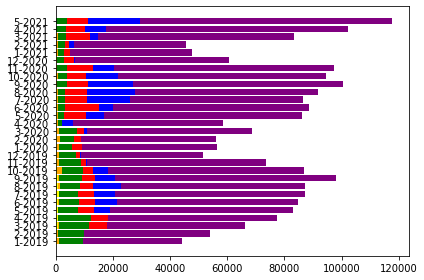

In [4]:
fig = figsize=(50,50)

plt.barh('m_y', 'ride_count', data=citi_by_date, color='purple')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=divvy_by_date, color='blue')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=capital_by_date, color='red')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=bay_by_date, color = 'green')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=metro_by_date, color='orange')
plt.tight_layout()

plt.barh('m_y', 'ride_count', data=pdx_by_date, color='yellow')
plt.tight_layout()


# legend.show()

Insert "City Column" in each DF

In [5]:
pdx_by_date['city'] = 'Portland'
metro_by_date['city'] = 'Los Angeles'
divvy_by_date['city'] = 'Chicago'
citi_by_date['city'] = 'New York City'
jc_citi_by_date['city'] = 'New York City'
capital_by_date['city'] = 'Washington DC'
bay_by_date['city'] = 'San Francisco'
bluebike_by_date['city'] = 'Boston'
niceride_by_date['city'] = 'Minneapolis'

Merge New York into One Dataset

In [6]:
jc_citi_by_date

,Unnamed: 0,ride_date,ride_count,month,year,m_y,city
0,0,2019-01-01,423,1,2019,1-2019,New York City
1,1,2019-01-02,822,1,2019,1-2019,New York City
2,2,2019-01-03,856,1,2019,1-2019,New York City
3,3,2019-01-04,895,1,2019,1-2019,New York City
4,4,2019-01-05,308,1,2019,1-2019,New York City
...,...,...,...,...,...,...,...
876,876,2021-05-27,2215,5,2021,5-2021,New York City
877,877,2021-05-28,1187,5,2021,5-2021,New York City
878,878,2021-05-29,560,5,2021,5-2021,New York City
879,879,2021-05-30,267,5,2021,5-2021,New York City


In [7]:
citi_by_date

,Unnamed: 0,ride_date,ride_count,month,year,m_y,city
0,0,2019-01-01,21778,1,2019,1-2019,New York City
1,1,2019-01-02,37670,1,2019,1-2019,New York City
2,2,2019-01-03,41544,1,2019,1-2019,New York City
3,3,2019-01-04,43776,1,2019,1-2019,New York City
4,4,2019-01-05,17356,1,2019,1-2019,New York City
...,...,...,...,...,...,...,...
876,876,2021-05-27,111369,5,2021,5-2021,New York City
877,877,2021-05-28,62150,5,2021,5-2021,New York City
878,878,2021-05-29,29672,5,2021,5-2021,New York City
879,879,2021-05-30,17476,5,2021,5-2021,New York City


In [8]:
all_citi_by_date = pd.concat([jc_citi_by_date, citi_by_date])

In [9]:
all_citi_by_date = all_citi_by_date.groupby(['ride_date']).agg({'ride_count':'sum', 'month':'first', 'year':'first', 'm_y':'first', 'city':'first'}).reset_index()

In [10]:
all_citi_by_date

,ride_date,ride_count,month,year,m_y,city
0,2019-01-01,22201,1,2019,1-2019,New York City
1,2019-01-02,38492,1,2019,1-2019,New York City
2,2019-01-03,42400,1,2019,1-2019,New York City
3,2019-01-04,44671,1,2019,1-2019,New York City
4,2019-01-05,17664,1,2019,1-2019,New York City
...,...,...,...,...,...,...
876,2021-05-27,113584,5,2021,5-2021,New York City
877,2021-05-28,63337,5,2021,5-2021,New York City
878,2021-05-29,30232,5,2021,5-2021,New York City
879,2021-05-30,17743,5,2021,5-2021,New York City


Concatenate All DataFrames into what will be exported into Power BI

In [11]:
all_cities = pd.concat([pdx_by_date, bay_by_date, divvy_by_date, all_citi_by_date, metro_by_date, capital_by_date, bluebike_by_date, niceride_by_date])

Sort

In [12]:
all_cities = all_cities.sort_values(['city', 'ride_date'])

In [13]:
all_cities

,Unnamed: 0,ride_date,ride_count,month,year,m_y,city,mm-dd
0,0.0,2019-01-01,1293,1,2019,1-2019,Boston,NaN
1,1.0,2019-01-02,2620,1,2019,1-2019,Boston,NaN
2,2.0,2019-01-03,2998,1,2019,1-2019,Boston,NaN
3,3.0,2019-01-04,3390,1,2019,1-2019,Boston,NaN
4,4.0,2019-01-05,778,1,2019,1-2019,Boston,NaN
...,...,...,...,...,...,...,...,...
847,847.0,2021-05-27,7385,5,2021,5-2021,Washington DC,NaN
848,848.0,2021-05-28,5653,5,2021,5-2021,Washington DC,NaN
849,849.0,2021-05-29,2893,5,2021,5-2021,Washington DC,NaN
850,850.0,2021-05-30,6084,5,2021,5-2021,Washington DC,NaN


Drop Unnecessary Columns

In [14]:
all_cities2 = all_cities

In [15]:
all_cities = all_cities.drop(['Unnamed: 0', 'month', 'year', 'm_y', 'mm-dd'], axis=1)

In [16]:
all_cities2 = all_cities2.drop(['Unnamed: 0', 'month', 'year'], axis=1)

Save as CSV

In [17]:
all_cities.to_csv('../data/By_date/all_cities.csv')

In [18]:
all_cities2[all_cities2['city'] == 'New York City']

,ride_date,ride_count,m_y,city,mm-dd
0,2019-01-01,22201,1-2019,New York City,NaN
1,2019-01-02,38492,1-2019,New York City,NaN
2,2019-01-03,42400,1-2019,New York City,NaN
3,2019-01-04,44671,1-2019,New York City,NaN
4,2019-01-05,17664,1-2019,New York City,NaN
...,...,...,...,...,...
876,2021-05-27,113584,5-2021,New York City,NaN
877,2021-05-28,63337,5-2021,New York City,NaN
878,2021-05-29,30232,5-2021,New York City,NaN
879,2021-05-30,17743,5-2021,New York City,NaN


In [19]:
all_cities2.groupby(['m_y', 'city']).agg({'ride_count':'sum'}).head()

ride_count
m_y    city                     
1-2019 Boston              69548
       Chicago            102919
       Los Angeles         19208
       New York City      983137
       Portland             5942

In [20]:
all_cities.groupby(['city']).agg({'ride_count':'sum'}).head()

,ride_count
city,
Boston,5298471
Chicago,8180238
Los Angeles,525844
Minneapolis,447268
New York City,48610857


Format to datetime

In [21]:
all_cities0 = all_cities
all_cities0['ride_date'] = pd.to_datetime(all_cities0['ride_date'], format='%Y-%m-%d')

In [22]:
all_cities0['ride_date'] = pd.to_datetime(all_cities0['ride_date'])
all_cities0['ride_date'] = all_cities0['ride_date'].dt.normalize()

Set Dates to Use in Timeline

In [23]:
# all_cities0 = all_cities[all_cities['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]

Recreate Manageable Datasets

In [24]:
chicago = all_cities0[all_cities0['city'] == 'Chicago']
sf = all_cities0[all_cities0['city'] == 'San Francisco']
nyc = all_cities0[all_cities0['city'] == 'New York City']
portland = all_cities0[all_cities0['city'] == 'Portland']
la = all_cities0[all_cities0['city'] == 'Los Angeles']
dc = all_cities0[all_cities0['city'] == 'Washington DC']
minneapolis = all_cities0[all_cities0['city'] == 'Minneapolis']
boston = all_cities0[all_cities0['city'] == 'Boston']

In [25]:
nyc.tail()

,ride_date,ride_count,city
876,2021-05-27,113584,New York City
877,2021-05-28,63337,New York City
878,2021-05-29,30232,New York City
879,2021-05-30,17743,New York City
880,2021-05-31,90244,New York City


In [26]:
all_cities0.sort_values('ride_date', ascending=True).tail()

,ride_date,ride_count,city
881,2021-05-31,3220,San Francisco
880,2021-05-31,90244,New York City
879,2021-05-31,17974,Chicago
477,2021-05-31,1093,Minneapolis
851,2021-05-31,9881,Washington DC


Separate Dataframes

In [27]:
chicago_covid = chicago[chicago['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]
sf_covid = sf[sf['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]
nyc_covid = nyc[nyc['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]
portland_covid = portland[portland['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]
la_covid = la[la['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]
dc_covid = dc[dc['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]
minneapolis_covid = minneapolis[minneapolis['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]
boston_covid = boston[boston['ride_date'].between('2020-01-01', '2020-06-30', inclusive=True)]

In [28]:
chicago_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 365 to 544
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ride_date   180 non-null    datetime64[ns]
 1   ride_count  180 non-null    int64         
 2   city        180 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.6+ KB


#### Create Working Timelines

In [29]:
chicago_covid = chicago_covid.sort_values('ride_date')

Chicago:

NameError: name 'func' is not defined

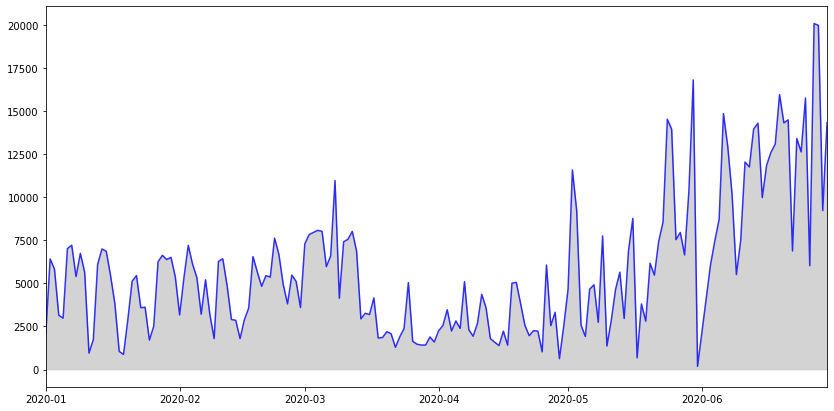

In [30]:
fig, ax1 = plt.subplots(figsize=(14,7)) # setting size of graph area

plt.style.use('ggplot')

#fill in area below ride count
ax1.fill_between(chicago_covid['ride_date'], chicago_covid['ride_count'], color="darkgray", alpha=0.5)

#plot line
ax1.plot(chicago_covid['ride_date'], chicago_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 

#set limit on x-axis
plt.xlim((pd.to_datetime("2020-01-01"),pd.to_datetime("2020-06-30")))


y_format = tkr.FuncFormatter(func)  # make formatter
#Add vertical lines for COVID activity
ax1.axvspan(pd.to_datetime('2020-03-21'), pd.to_datetime('2020-05-29'), alpha=0.2, color='red', label= 'Shelter-in-place order')
ax1.axvline(x = pd.to_datetime('2020-01-21'), lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in state')
ax1.axvline(x = pd.to_datetime('2020-03-15'), lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants close dining rooms')
ax1.axvline(x = pd.to_datetime('2020-03-09'), lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
# ax1.axvline(x = '2020-07-13', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
ax1.axvline(x = pd.to_datetime('2020-03-25'), lw = 3, color = 'tab:orange', ls = '--', alpha = 0.8,label= 'Divvy offers free rides to essential workers')
# ax1.axvline(x = '2020-12-12', lw = 3, color = 'tab:olive', ls = 'dashdot', alpha = 0.8,label= '')

ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%y'))

plt.title("Chicago COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()
plt.xticks(rotation=45)
ax1.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

plt.savefig('../assets/chicago_covid_timeline.png', bbox_inches='tight', pad_inches=.1);

In [ ]:
# # ax1 = plt.plot('ride_date', 'ride_count', data=chicago_covid)

# # ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b - %y'))

# fig = plt.figure(figsize=(12, 10), dpi=80)
# ax1 = fig.add_subplot(111)

# # ax1.axvline(x = '2020-03-21', lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'Shelter-in-place order begins')


# # lines = ax1.plot(chicago_covid['ride_date'], chicago_covid['ride_count'], label='Open values')
# # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))



# ax1.xaxis_date()


Portland

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,6)) # setting size of graph area

plt.style.use('ggplot')


# area graph to show number cases
ax1.fill_between(portland_covid['ride_date'], portland_covid['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(portland_covid['ride_date'], portland_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 

#set limit on x-axis
plt.xlim((pd.to_datetime("2020-01-01"),pd.to_datetime("2020-06-30")))


# COVID-19 Happenings
ax1.axvspan(pd.to_datetime('2020-03-23'), pd.to_datetime('2020-05-18'), alpha=0.2, color='red', label= 'Stay-at-home order')
# ax1.axvline(x = '2020-03-16', lw = 3, color = 'red', ls = '--', alpha = 0.8,label= '')
ax1.axvline(x = pd.to_datetime('2020-03-08'), lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = pd.to_datetime('2020-03-16'), lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants close dining rooms')
ax1.axvline(x = pd.to_datetime('2020-04-28'), lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= 'Slow Streets | Safe Streets initiative')
# ax1.axvline(x = '2020-10-01', lw = 3, color = 'tab:olive', ls = '--', alpha = 0.8,label= '')
ax1.axvline(x = pd.to_datetime('2020-04-15'), lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Biketown offers free rides to essential workers')


# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%y'))
plt.xticks(rotation=45)
ax1.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

# Add titles
plt.title("Portland COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

plt.savefig('../assets/portland_covid_timeline.png', bbox_inches='tight', pad_inches=.1);

Washington DC

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,6)) # setting size of graph area

plt.style.use('ggplot')


# area graph to show number cases
ax1.fill_between(dc_covid['ride_date'], dc_covid['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(dc_covid['ride_date'], dc_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 

#set limit on x-axis
plt.xlim((pd.to_datetime("2020-01-01"),pd.to_datetime("2020-06-30")))


# COVID-19 Happenings
ax1.axvspan(pd.to_datetime('2020-03-20'), pd.to_datetime('2020-06-08'), alpha=0.2, color='red', label= 'Stay-at-home order')
ax1.axvline(x = pd.to_datetime('2020-03-07'), lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in Washington DC')
ax1.axvline(x = pd.to_datetime('2020-03-11'), lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = pd.to_datetime('2020-03-16'), lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants close dining rooms')
# ax1.axvline(x = '2020-04-28', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
# ax1.axvline(x = '2020-10-01', lw = 3, color = 'tab:olive', ls = '--', alpha = 0.8,label= '')
ax1.axvline(x = pd.to_datetime('2020-03-20'), lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Capital Bikeshare offers free rides to essential workers')

# ax1.text(pd.to_datetime('2020-04-15'), 4000, 'No Data Available for April 2020', ha='center')
ax1.annotate('Missing Data for April 2020', xy=(pd.to_datetime('2020-04-15'), 2500), xytext=(pd.to_datetime('2020-03-30'), 4000),
            arrowprops=dict(facecolor='black', shrink=0.05),)

# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%y'))
plt.xticks(rotation=45)
ax1.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

# Add titles
plt.title("Washington DC COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

plt.savefig('../assets/dc_covid_timeline.png', bbox_inches='tight', pad_inches=.1);

Minneapolis

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,6)) # setting size of graph area

plt.style.use('ggplot')

# area graph to show number cases
ax1.fill_between(minneapolis_covid['ride_date'], minneapolis_covid['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(minneapolis_covid['ride_date'], minneapolis_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 

#set limit on x-axis
plt.xlim((pd.to_datetime("2020-01-01"),pd.to_datetime("2020-06-30")))

# COVID-19 Happenings
ax1.axvspan(pd.to_datetime('2020-03-25'), pd.to_datetime('2020-05-18'), alpha=0.2, color='red', label= 'Stay-at-home order')
ax1.axvline(x = pd.to_datetime('2020-03-01'), lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in state')
ax1.axvline(x = pd.to_datetime('2020-03-13'), lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = pd.to_datetime('2020-03-16'), lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'All non-essential businesses ordered to close')
# ax1.axvline(x = '2020-04-28', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
ax1.axvline(x = pd.to_datetime('2020-05-25'), lw = 3, color = 'darkgreen', ls = '--', alpha = 0.8,label= 'George Floyd protests')
ax1.axvline(x = pd.to_datetime('2020-04-06'), lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Niceride offers free rides to essential workers')

ax1.text(pd.to_datetime('2020-02-01'), 250, 'No Rider Data Available Between', ha='center', weight='bold')
ax1.text(pd.to_datetime('2020-02-01'), 175, 'December and April Each Year', ha='center', weight='bold')

# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%y'))
plt.xticks(rotation=45)
ax1.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

# Add titles
plt.title("Minneapolis COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

plt.savefig('../assets/minneapolis_covid_timeline.png', bbox_inches='tight', pad_inches=.1);

Boston

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,6)) # setting size of graph area

plt.style.use('ggplot')


# area graph to show number cases
ax1.fill_between(boston_covid['ride_date'], boston_covid['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(boston_covid['ride_date'], boston_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 

#set limit on x-axis
plt.xlim((pd.to_datetime("2020-01-01"),pd.to_datetime("2020-06-30")))

# COVID-19 Happenings
ax1.axvspan(pd.to_datetime('2020-03-23'), pd.to_datetime('2020-05-18'), alpha=0.2, color='red', label= 'Stay-at-home order')
ax1.axvline(x = pd.to_datetime('2020-02-01'), lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in state')
ax1.axvline(x = pd.to_datetime('2020-03-10'), lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = pd.to_datetime('2020-03-15'), lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants limit capacity')
# ax1.axvline(x = '2020-04-28', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
# ax1.axvline(x = '2020-05-25', lw = 3, color = 'darkgreen', ls = '--', alpha = 0.8,label= 'George Floyd protests')
ax1.axvline(x = pd.to_datetime('2020-04-15'), lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Bluebikes offers free rides to essential workers
# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%y'))
plt.xticks(rotation=45)
ax1.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

# Add titles
plt.title("Boston COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

plt.savefig('../assets/boston_covid_timeline.png', bbox_inches='tight', pad_inches=.1);

Los Angeles

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,7)) # setting size of graph area

plt.style.use('ggplot')


# area graph to show number cases
ax1.fill_between(la_covid['ride_date'], la_covid['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(la_covid['ride_date'], la_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 

#set limit on x-axis
plt.xlim((pd.to_datetime("2020-01-01"),pd.to_datetime("2020-06-30")))

# COVID-19 Happenings
ax1.axvspan(pd.to_datetime('2020-03-19'), pd.to_datetime('2021-01-25'), alpha=0.2, color='red', label= 'Stay-at-home order')
ax1.axvline(x = pd.to_datetime('2020-01-24'), lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in state')
ax1.axvline(x = pd.to_datetime('2020-02-25'), lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = pd.to_datetime('2020-03-16'), lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants close dining rooms')
# ax1.axvline(x = '2020-04-28', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
# ax1.axvline(x = '2020-05-25', lw = 3, color = 'darkgreen', ls = '--', alpha = 0.8,label= 'George Floyd protests')
# ax1.axvline(x = '2021-04-15', lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Vaccinations available to ages 16+')


# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%y'))
plt.xticks(rotation=45)
ax1.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

# Add titles
plt.title("Los Angeles COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

plt.savefig('../assets/la_covid_timeline.png', bbox_inches='tight', pad_inches=.1);

New York

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,7)) # setting size of graph area

plt.style.use('ggplot')


# area graph to show number cases
ax1.fill_between(nyc_covid['ride_date'], nyc_covid['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(nyc_covid['ride_date'], nyc_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 

#set limit on x-axis
plt.xlim((pd.to_datetime("2020-01-01"),pd.to_datetime("2020-06-30")))


# COVID-19 Happenings
ax1.axvspan(pd.to_datetime('2020-03-22'), pd.to_datetime('2020-06-08'), alpha=0.2, color='red', label= 'Stay-at-home order')
ax1.axvline(x = pd.to_datetime('2020-03-01'), lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in state')
ax1.axvline(x = pd.to_datetime('2020-03-17'), lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = pd.to_datetime('2020-03-17'), lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants close dining rooms')
# ax1.axvline(x = '2020-04-28', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
# ax1.axvline(x = '2020-05-25', lw = 3, color = 'darkgreen', ls = '--', alpha = 0.8,label= 'George Floyd protests')
ax1.axvline(x = pd.to_datetime('2020-03-24'), lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Citi Bike offers free rides to essential workers')

# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%y'))
plt.xticks(rotation=45)
ax1.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

# Add titles
plt.title("New York City COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

plt.savefig('../assets/ny_covid_timeline.png', bbox_inches='tight', pad_inches=.1);

San Francisco

In [ ]:
fig, ax1 = plt.subplots(figsize=(14,7)) 

plt.style.use('ggplot')

#fill between bottom of x-axis and line
ax1.fill_between(sf_covid['ride_date'], sf_covid['ride_count'], color="darkgray", alpha=0.5)

#Main plot
ax1.plot(sf_covid['ride_date'], sf_covid['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 

#set limit on x-axis
plt.xlim((pd.to_datetime("2020-01-01"),pd.to_datetime("2020-06-30")))

#COVID-19 timeline
ax1.axvspan(pd.to_datetime('2020-03-16'), pd.to_datetime('2021-01-25'), alpha=0.2, color='red', label= 'Stay-at-home order')
ax1.axvline(x = pd.to_datetime('2020-01-24'), lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in state')
ax1.axvline(x = pd.to_datetime('2020-02-25'), lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = pd.to_datetime('2020-03-15'), lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants close dining rooms')
# ax1.axvline(x = '2020-04-28', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
# ax1.axvline(x = '2020-10-01', lw = 3, color = 'tab:olive', ls = '--', alpha = 0.8,label= '')
ax1.axvline(x = '2020-03-19', lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Baywheels offers free rides to essential workers')

#format month and day on x-axis
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%y'))
plt.xticks(rotation=45)
ax1.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

#titles
plt.title("San Francisco COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

plt.savefig('../assets/sf_covid_timeline.png', bbox_inches='tight', pad_inches=.1);

In [ ]:
nyc_test = nyc_covid
# nyc_test = nyc_test.dropna()
nyc_test = nyc_test.sort_values('ride_date')

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,9)) # setting size of graph area

plt.style.use('ggplot')


# area graph to show number cases
ax1.fill_between(nyc_test['ride_date'], nyc_test['ride_count'], color="darkgray", alpha=0.5)

# line to highlight area graph
ax1.plot(nyc_test['ride_date'], nyc_test['ride_count'], color="blue", alpha=0.8, label = 'Ride Count') 

#set limit on x-axis
plt.xlim((pd.to_datetime("2020-01-01"),pd.to_datetime("2020-06-30")))


# COVID-19 Happenings
ax1.axvspan(pd.to_datetime('2020-03-22'), pd.to_datetime('2021-05-15'), alpha=0.2, color='red', label= 'Stay-at-home order')
ax1.axvline(x = pd.to_datetime('2020-03-01'), lw = 3, color = 'red', ls = '--', alpha = 0.8,label= 'First case of COVID-19 in state')
ax1.axvline(x = pd.to_datetime('2020-03-17'), lw = 3, color = 'y', ls = '--', alpha = 0.8,label= 'State of emergency declared')
ax1.axvline(x = pd.to_datetime('2020-03-17'), lw = 3, color = 'purple', ls = '--', alpha = 0.8,label= 'Bars and restaurants limit capacity')
# ax1.axvline(x = '2020-04-28', lw = 3, color = 'darkgreen', ls = ':', alpha = 0.8,label= '')
# ax1.axvline(x = '2020-05-25', lw = 3, color = 'darkgreen', ls = '--', alpha = 0.8,label= 'George Floyd protests')
# ax1.axvline(x = '2021-04-15', lw = 3, color = 'tab:orange', ls = 'dashdot', alpha = 0.8,label= 'Vaccinations available to ages 16+')


# formatting x axis date to show month and year
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%y'))
plt.xticks(rotation=45)
ax1.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

# Add titles
plt.title("New York City COVID-19 Timeline")
ax1.set_xlabel("Dates")
ax1.set_ylabel('Total Rides')
ax1.legend()

# plt.savefig('../assets/ny_covid_timeline.png');